<center><strong><span style="font-family:AppleMyungjo, sans-serif;font-size: 24px;">Title: The Solution of Fokker-Planck Equation under Heston Stochastic Processes</span></strong></center>
<center>Created by: LANG TAO, WANG</center>

# Introduction

The current algorithm frameworks was proposed by S.Stoykov in the paper - **Numerical Solution of the Fokker-Planck Equation by Variational Approach: An application to Pricing Barrier Options**.

Applying the variational approach leads to the weak formulation of the Fokker-Planck equation (FPE). By replacing the probability density function (PDF) with an approximation based on a combination of B-spline basis functions in the weak formulation, we obtain a system of ordinary differential equations (ODEs). This system is solved numerically using a fifth-order implicit Runge-Kutta method. Finally, the
numerical solution is applied to price barrier options under the Heston stochastic volatility model.

Paper Source: 
Stoykov, S. (2024). [Numerical Solution of Fokker-Planck Equation by Variational Approach – an Application to Pricing Barrier Options. *Wilmott*, 2024(133).](https://doi.org/10.54946/wilm.12077)


## Heston Model

$$\begin{aligned}
dS_t &= rS_t + \sqrt{V_t}S_{t}dW_t^S \\ 
dV_t &= \kappa(\theta - V_t)dt + \eta \sqrt{V_t} dW_t^V
\end{aligned}$$

where $S_t$ represents the price of underlying asset, $V_t$ represents the variance of the asset, $r$ represents the risk-free rate, $\theta$ represents the long-term variance, $\kappa$ is the mean-reversion rate, and $\eta$ represents the volatility of the variance. $W_t^S$ and $W_t^V$ are the Wiener processes with the correlation $\rho$.

The **Fokker-Planck equation** that corresponds to system is:

$$\begin{aligned}
\frac{\partial p(x,v,t)}{\partial t} + r \frac{\partial}{\partial s} (sp(s,v,t)) + \frac{\partial}{\partial v}(\kappa (\theta -v)p(s,v,t))
 - \frac{1}{2} \frac{\partial ^2}{\partial s^2}(s^2vp(s,v,t)) \\
- \rho \eta \frac{\partial ^2}{\partial s \partial v}(svp(s,v,t)) - \frac{1}{2} \eta ^2 \frac{\partial ^2}{\partial v^2}(vp(x,v,t))= 0
\end{aligned}$$

The **probability current J**, have the follow expression:

$$
\begin{aligned}
 J_{1} &= rsp(s, v,t)-\frac{1}{2}\frac{\partial}{\partial s}\left(s^{2} v p(s, v,t)\right)-\frac{1}{2}\rho\eta\frac{\partial}{\partial v}\left(s v p(s, v,t)\right) \\
 & =rsp(s, v,t)-s v p(s, v,t)-\frac{1}{2}s^{2} v\frac{\partial p(s, v,t)}{\partial s}-\frac{1}{2}\rho\eta sp(s, v,t)\\
 & -\frac{1}{2}\rho\eta sv\frac{\partial p(s,v,t)}{\partial v} \\ 
 J_{2} &= \kappa(\theta- v)p(s, v,t)-\frac{1}{2}\rho\eta\frac{\partial}{\partial s}(s v p(s, v,t))-\frac{1}{2}\eta^{2}\frac{\partial}{\partial v}( v p(s, v,t)) \\
 & =\kappa\theta p(s, v,t)-\kappa v p(s, v,t)-\frac{1}{2}\rho\eta v p(s, v,t)-\frac{1}{2}\rho\eta s v\frac{\partial p(s, v,t)}{\partial s}\\
 & -\frac{1}{2}\eta^{2}p(s, v,t)-\frac{1}{2}\eta^{2} v\frac{\partial p(s, v,t)}{\partial v}
\end{aligned} \tag{1}
$$

The **numerical procedure** looks for an approximation of the solution in the following form:

$$ p(s,v,t) = \sum_{i=1}^{k} \varphi_{i}(s,v) q_i(t)$$

$\varphi_{i}(s,v)$ are called **shape(or trial) functions** and $q_{i}(t)$ are function of time.

Under the **variational formulation**, **Integration by part** leads to the following weak formulation of the problem:

$$
\int_{\Omega}\varphi(s,v)\frac{ \partial p(s,v,t) }{ \partial t }d\Omega - \int_{\Omega}\nabla \varphi(s,v) \mathbf{J}(s,v,t)d\Omega + \int_{\partial \Omega} \varphi(s,v)\mathbf{J}(s,v,t)\cdot \mathbf{n}d\Omega = 0\tag{2}
$$

The **last term** of equation can be **omitted**, since it is satisfied either by **essential or natural boundary condition**.

Performing the integration, one obtains the following system of first-order ordinary differential equation:

$$
\mathbf{M}\dot{\mathbf{q}}(t)+\mathbf{K}\mathbf{q}(t) = \mathbf{0}
$$

with the initial condition $\mathbf{q}(0)=\mathbf{q}_{0}$, where the vector $\mathbf{q}_{0}$ is determined from initial condition $p_{0}(s,v)$ and the basis of shape functions ${\varphi_{i}(s,v)}$. Matrices $\mathbf{M}$ and $\mathbf{K}$ are called **mass** and **stiffness** matrices.

Let $\boldsymbol{\varphi}={\varphi_{i}(s, v)}$ denote the vector of shape functions. Introduction the expression of probability current, given in (1), into the weak formulation of the problem, Equation (2), the mass and stiffness matrices are obtained in the following form:

$$
\begin{gathered}
\mathbf{M}=\int_{\Omega} \varphi(s, v)^T \varphi(s, v) d \Omega \\
\mathbf{K}=\left(-r+\frac{1}{2} \rho \eta\right) \int_{\Omega} s \frac{\partial \varphi(s, v)^T}{\partial s} \varphi(s, v) d \Omega+\int_{\Omega} s v \frac{\partial \varphi(s, v)^T}{\partial s} \varphi(s, v) d \Omega \\
+\frac{1}{2} \int_{\Omega} s^2 v \frac{\partial \varphi(s, v)^T}{\partial s} \frac{\partial \varphi(s, v)}{\partial s} d \Omega+\frac{1}{2} \rho \eta \int_{\Omega} s v \frac{\partial \varphi(s, v)^T}{\partial s} \frac{\partial \varphi(s, v)}{\partial v} d \Omega \\
+\left(-\kappa \theta+\frac{1}{2} \eta^2\right) \int_{\Omega} \frac{\partial \varphi(s, v)^T}{\partial v} \varphi(s, v) d \Omega+\left(\kappa+\frac{1}{2} \rho \eta\right) \int_{\Omega} v \frac{\partial \varphi(s, v)^T}{\partial v} \varphi(s, v) d \Omega \\
+\frac{1}{2} \rho \eta \int_{\Omega} s v \frac{\partial \varphi(s, v)^T}{\partial v} \frac{\partial \varphi(s, v)}{\partial s} d \Omega+\frac{1}{2} \eta^2 \int_{\Omega} v \frac{\partial \varphi(s, v)^T}{\partial v} \frac{\partial \varphi(s, v)}{\partial v} d \Omega
\end{gathered}
$$

## Numerical Procedure 

### Discretization

- **B-Splines with non-uniform knot vectors** are used for the numerical discretization. 
  $\varphi_{i}(s,v)$ is a two-dimensional B-spline basis function.
- A down-and-out barrier option is considered in the numerical example. The discretization is performed in a **local domain**$[0,1] \times[0,1]$. The barrier condition requires that the option ceases to exist when the price of the underlying asset falls to the **barrier level**. In the local coordinate system, this level is defined by $s=0$; hence, absorbing boundary conditions are implemented. The boundary at $v=0$ should be reflecting; so, even if the **Feller condition is violated**, the variance might become close to zero, but it cannot pass this level. The other boundaries should be sufficiently far from the initial condition, so the time evolution of the solution does not reach them. In such a case, it does not matter if one applies reflecting or absorbing boundary conditions. In the current numerical procedure, reflecting boundary conditions are assumed at $s=1$ and $v=1$.

### Initial Condition

The initial condition is determined by the asset's price $S_{0}$ and its variance $V_{0}$ at the initial time $t=0$. 

- The two-dimensional **delta function** is approximated by a two-dimensional **normal distribution** with a mean at point $(S_{0},V_{0})$ and a small standard deviation. The approximation of the Dirac delta function is achieved by the vector of shape functions $\boldsymbol{\varphi}={\varphi_{i}(s,v)}$, defined earlier as the B-Spline basis. 
- The **knots** are selected in a way to be concentrated near the **initial condition**, so the initial condition can be better approximated. Furthermore, Knots for B-Splines used for the variance are also concentrated near the zero boundary. This selection is required for cases where the **Feller condition** is violated, and the variance becomes close to zero. 
- B-Splines basis functions that are used for space discretization of the asset's price and satisfy the absorbing boundary conditions at $s=0$.

### ODE Solving Procedure

The discretization scheme results in linear system of **first-order ordinary differential equations**. 

- The mass and stiffness matrices are **sparse matrices**, which allow one to use appropriate operations and solvers for sparse system.
- The solution is obtained numerically by the **fifth-order implicit Runge-Kutta method** of the RadauIIA family. An adaptive time step is implemented, whose size is controlled by the **third-order method**. Once the probability density function of the stochastic process is obtained at a given maturity time, one can compute call and put options for different strikes by numerical integration.

### Parameters

- The initial price of the underlying asset, as well as the barrier level and Heston parameters are given Table 1.

<style>
table {margin-left: auto; margin-right: auto;}
</style>
<center><strong> Table 1: Heston parameters barrier option parameter values </strong></center>

| Parameters                                                | Values |
| :-------------------------------------------------------- | :----: |
| Down-and-out barrier                                      |  50.0  |
| Initial price $S_{0}$                                     |  60.0  |
| Risk free rate r                                          |  0.1   |
| Maturity T                                                |  0.6   |
| Initial variance $V_{0}$                                  |  0.1   |
| Long term variance $\theta$                               |  0.05  |
| Mean-reversion rate $\kappa$                              |  1.2   |
| Volatility of variance $\eta$                             |  0.35  |
| Correlation $\rho$                                        |  -0.4  |

- Comparing the **marginal distribution of the asset's price** for the initial condition with difference standard deviations at different time-steps. The price of the asset is 60.0, and the standard deviations of the initial condition vary from 0.1 to 2.0.

  **standard deviations** array: [0.1, 0.2, 0.5, 1.0, 2.0];
  
  **time steps**: [0, '1 day', '10 days', '30 days', '0.6 years'].

# Import Files and Libraries

In [1]:
from FPE_Solver_Final_Version import HestonSolver, BSplineBasis, MultivariateBSpline, RecombinationBasis, GenerateKnots
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import perf_counter 

Source Code Links: ["FPE_Solver_Final_Version" python file](https://github.com/elevenwang-creator/CQF-project/blob/main/FokkerPlanckSolver/FPE_Solver_Final_Version.py)

**Environment Information**

In [2]:
# List installed packages
!conda list | grep -E 'numpy|scipy|matplotlib|pandas|plotly|cvxpy'

# Python version 
import sys
print(f"Python: {sys.version}")

cvxpy                     1.7.1           py311ha1ab1f8_0    conda-forge
cvxpy-base                1.7.1           py311hff7e5bb_0    conda-forge
matplotlib                3.10.5          py311ha1ab1f8_0    conda-forge
matplotlib-base           3.10.5          py311h66dac5a_0    conda-forge
matplotlib-inline         0.1.7              pyhd8ed1ab_1    conda-forge
numpy                     2.0.2           py311h649a571_1    conda-forge
pandas                    2.3.1           py311hff7e5bb_0    conda-forge
plotly                    6.3.0                    pypi_0    pypi
scipy                     1.14.1          py311hf056e50_2    conda-forge
Python: 3.11.13 | packaged by conda-forge | (main, Jun  4 2025, 14:52:34) [Clang 18.1.8 ]


**Operating System Information**

In [3]:
!neofetch --off --disable title memory --color_blocks off

 
OS: macOS 26.0.1 25A362 arm64 
Host: MacBookPro18,3 
Kernel: 25.0.0 
Uptime: 20 days, 14 hours, 54 mins 
Packages: 109 (brew) 
Shell: zsh 5.9 
Resolution: 1920x1080, 1512x982 
DE: Aqua 
WM: Quartz Compositor 
WM Theme: Blue (Dark) 
Terminal: Code Helper (Plugin) 
CPU: Apple M1 Pro 
GPU: Apple M1 Pro 



# Generate Non-uniform Knots

In the current work, the inverse procedure of the parabolic function generates non-repeating and non-uniform inner knots, which form a global knots vector. Since Runge's phenomenon occurs at the edges of an interval, we insert a set of Chebyshev nodes with boundary $\textbf{initial value} \pm 4.5 \cdot \textbf{standard deviation}$ for better approximation of the delta function.

$$f(x) = 0.5 * a * (x - factor)^2 + centor$$

In [50]:
# Example usage
cheby_knots = 1                 # chebyshev knots number

n_x =  18                       # parabolic function knots number
d_x = 3                         # degree of B-spline
#center_x = round(9.5/100, 3)   # center point (0-1)
center_x = 0.1
bound_x = tuple((50.0, 150.0))
x_mean  = 60.0
x_std = 0.1
x = GenerateKnots(n_x, d_x, method='non-uniform', center=center_x, boundary=bound_x, 
                  mean=x_mean, std=x_std, cheby_num=cheby_knots).generate_knots()

n_v = 18                        # knots number
d_v = 3                         # degree of B-spline
center_v = 0.1                  # center point (0-1)
bound_v  = tuple((0.0, 1.0))    # variance range
v_mean  = 0.1
v_std = 0.001
v = GenerateKnots(n_v, d_v, method='non-uniform', center=center_v, boundary=bound_v,
                  mean=v_mean, std=v_std, cheby_num=cheby_knots).generate_knots()
print(f's knots numbers: {x.shape}; v knots numbers: {v.shape}')

s knots numbers: (18,); v knots numbers: (18,)


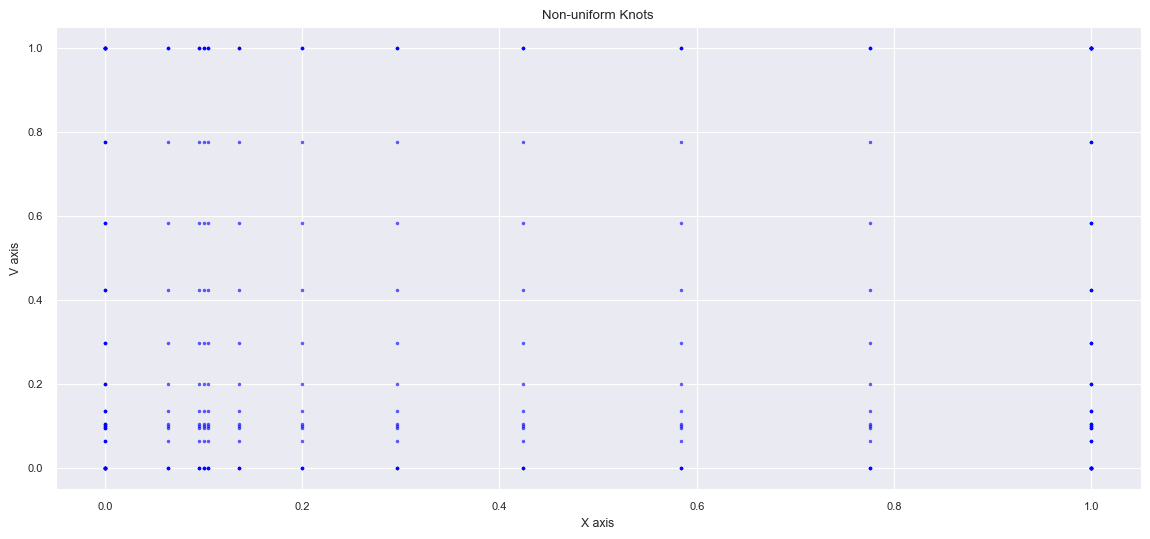

In [51]:
# Create knots meshgrid
X , V = np.meshgrid(x, v)

fig, ax = plt.subplots(figsize=(14, 6))
scatter = ax.scatter(X, V, s=5, c='blue', alpha=0.6)
ax.set_title('Non-uniform Knots')
ax.set_xlabel('X axis')
ax.set_ylabel('V axis')
ax.grid(True)

# B Spline Basis Functions

**Boundary Conditions**

Boundary conditions are handled in two ways: by managing knot edge repetitions or by employing the basis recombination method. Absorbing conditions are applied at s=0, while reflecting conditions are intended for v=0 and are currently presumed at s=1 and v=1 in our numerical approach. For the basis recombination method, some usual choices are: 

- [Dirichlet BCs(Absorbing BCs)](https://en.wikipedia.org/wiki/Dirichlet_boundary_condition)($s=0$ at the boundaries) by removing the first and last B-splines, i.e. 
- [Neumann BCs(Reflecting BCs)](https://en.wikipedia.org/wiki/Neumann_boundary_condition)($s' \text{or} v'=0$ at the boundaries) by adding the two first (and two last) B-splines, i.e. 

In [6]:
u = np.linspace(0.0, 0.999, 500)

In [7]:
def plot_func(basis, knots, offset=0.05):
    # Plotting the B-spline basis functions
    plt.figure(figsize=(14, 6))
    basis_dense = basis.toarray() 
    for i in range(basis_dense.shape[1]):
        b = basis_dense[:, i]
        plt.plot(u, b, label=f'N_{i},{d_x}')
    # Plot knots
    y = np.zeros_like(knots)
    for i in range(1, len(y)):
        if knots[i] == knots[i-1]:
            y[i] = y[i-1] + offset
    plt.plot(knots, y, 'b.', markersize=10, label='knots')

    plt.title('B-spline Basis Functions (Auto-generated Non-uniform Knots)')
    plt.xlabel('u')
    plt.ylabel('$N_{i,p}(u)$')
    plt.grid(False)
    plt.show()

## Basis Functions

In [8]:
# Generate a B-spline basis for a given degree and knot vector.
Bspline1D = BSplineBasis(d_x, x)
basis = Bspline1D.basis_function(u)
basis_derivative = Bspline1D.first_derivative(u)

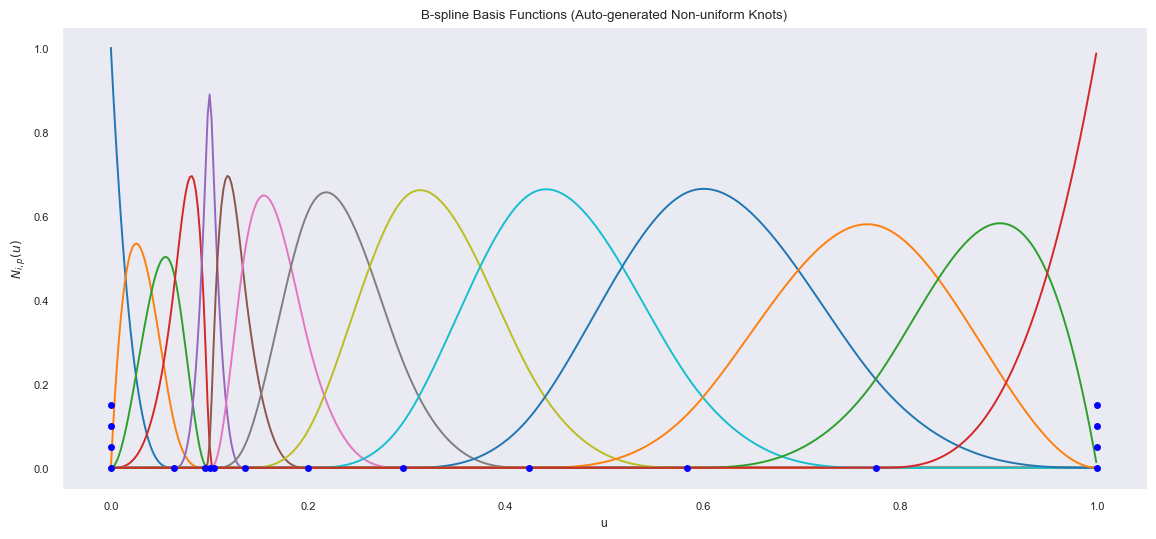

In [9]:
plot_func(basis, x)

## Imposing boundary conditons

### Method 1

In [10]:
# Generate a B-spline basis for a given degree and knot vector.
x = x[1:]
print(f's knots numbers: {x.shape}; v knots numbers: {v.shape}')
Bspline1D = BSplineBasis(d_x, x)
basis = Bspline1D.basis_function(u)
basis_derivative = Bspline1D.first_derivative(u)

s knots numbers: (17,); v knots numbers: (18,)


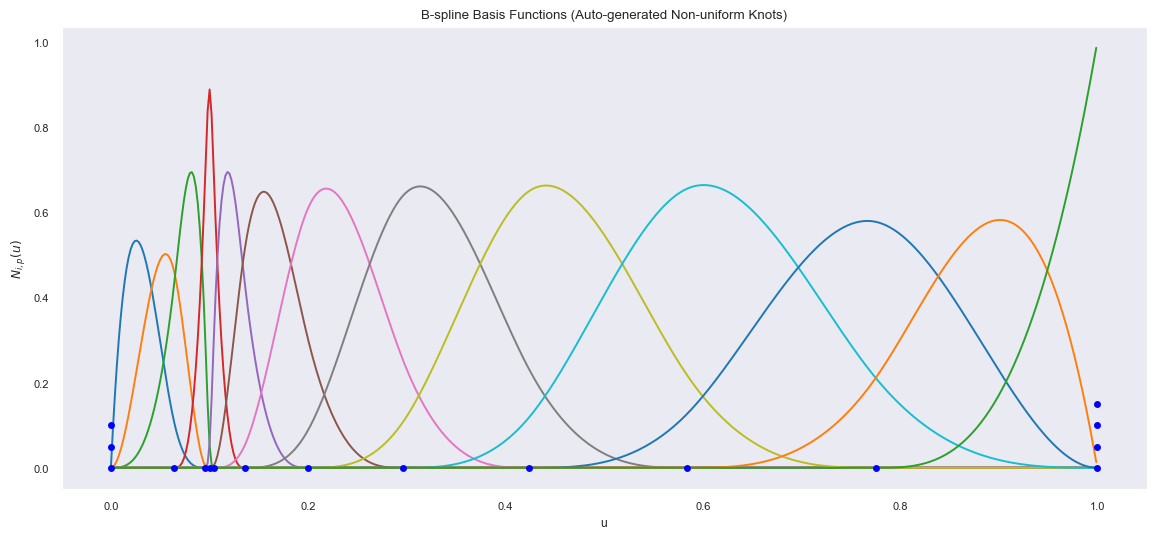

In [11]:
plot_func(basis, x)

### Method 2: Recombined Basis Functions

In [12]:
# Recombiantion basis
#conditions = ('dirichlet', 'dirichlet')
conditions = ('newmann', 'newmann')
#conditions = ('dirichlet', 'newmann')
#conditions = ('newmann', 'dirichlet')
Recombinations = RecombinationBasis(d_v, v, conditions)
recomb_basis = Recombinations.basis_function(u)
recomb_basis_derivative = Recombinations.first_derivative(u)
recomb_matrix = Recombinations.recombination_matrix

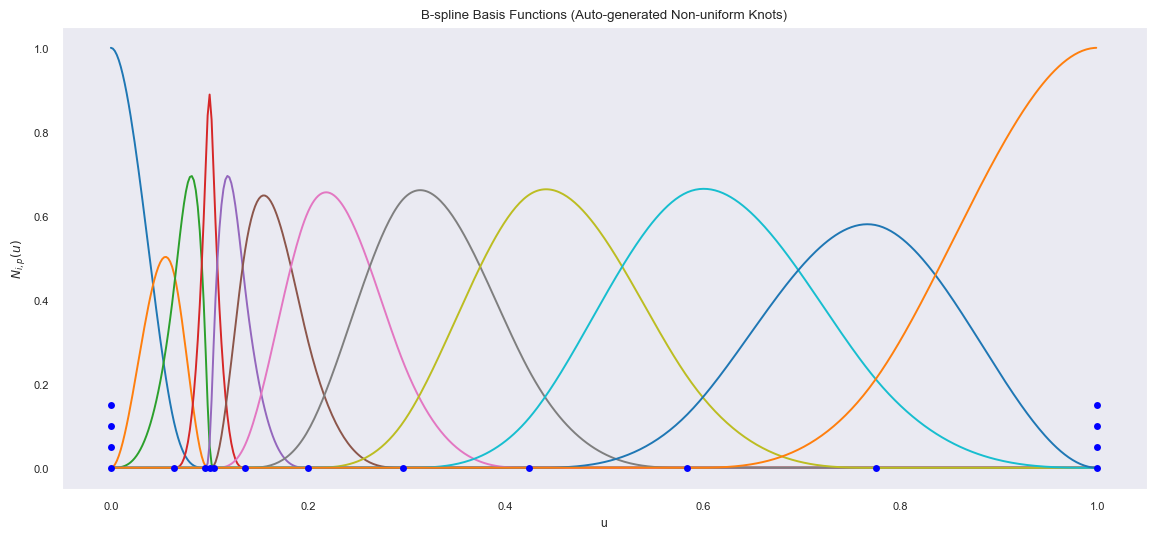

In [13]:
plot_func(recomb_basis, v)

**First Derivatives**

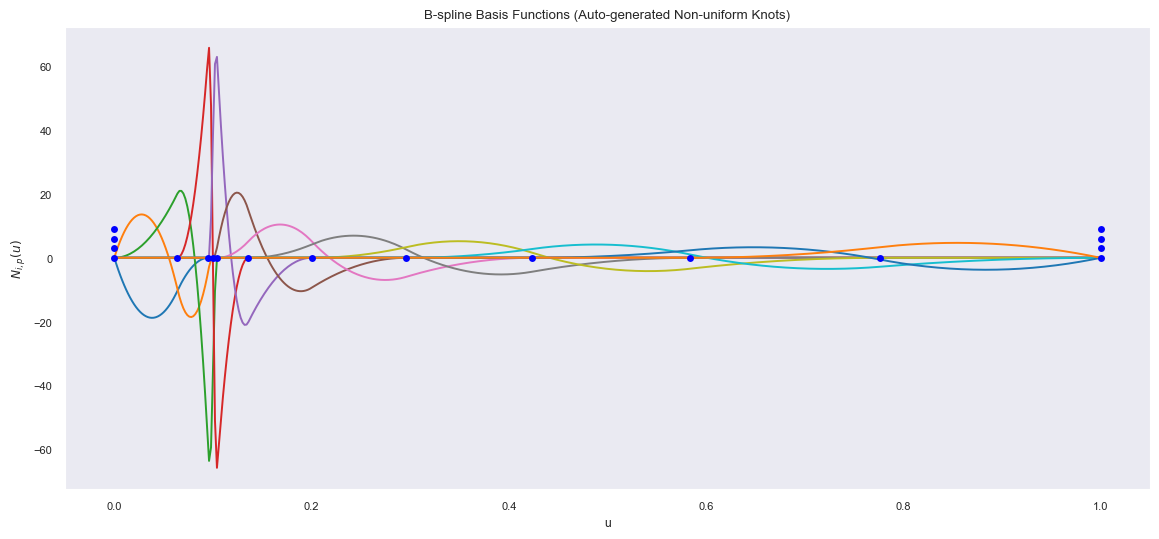

In [14]:
plot_func(recomb_basis_derivative, v, offset=3.0)

# Multivariate B-Spline basis functions

For two dimensions, B-spline basis functions are typically constructed as tensor products of one-dimensional B-splines. For example, if $B_i(x)$ is a B-spline basis function in the (x)-direction and $B_j(v)$ in the (v)-direction, the two-dimensional basis function is $B_{ij}(x, v) = B_i(x) \otimes B_j(v)$. This approach leverages the separability of the two dimensions, allowing efficient computation.

In [15]:
# Example usage:
# Create 3D B-spline
degrees = [d_x, d_v]  # degrees for each dimension
knots_list = [x, v]
    
# Create evaluation points
u_points = np.linspace(0, 1, 500)
v_points = np.linspace(0, 1, 500)
points_list = [u_points, v_points]
conditions_list = []
    
# Initialize multivariate B-spline
multi_spline = MultivariateBSpline(degrees, knots_list, conditions_list)
    
# Compute basis functions
two_d_basis = multi_spline.tensor_product_basis(points_list)
print(f"Two dimensioal Basis shape: {two_d_basis.shape}")
    
# Compute partial derivative
two_d_deriv = multi_spline.partial_derivative(points_list, dimension=1)
print(f"Two dimensional Derivative shape: {two_d_deriv.shape}")

Two dimensioal Basis shape: (250000, 182)
Two dimensional Derivative shape: (250000, 182)


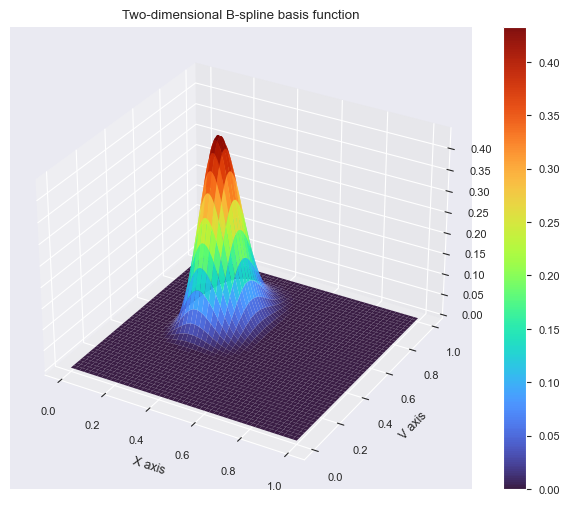

In [16]:
two_dimension = two_d_basis.toarray()
# Reshape points for visualization
V, U = np.meshgrid(points_list[1], points_list[0])
Y = two_dimension[:, 108].reshape(len(points_list[0]), len(points_list[1]))

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(U, V, Y, cmap='turbo', edgecolor='none', alpha=0.95)
plt.colorbar(surf)
plt.xlabel('X axis')
plt.ylabel('V axis')
plt.title('Two-dimensional B-spline basis function')
plt.show()

# Fokker-Planck Equation Solver

## Gauss-Legendre Quadrature Overview

[Gauss-Legendre quadrature](https://en.wikipedia.org/wiki/Gauss%E2%80%93Legendre_quadrature) approximates an integral over $[-1, 1]$ as:

$$ \int_{-1}^{1} f(x) dx \approx \sum_{i=1}^{n} w_{i} f(x_i) $$

where $x_i$ are the quadrature nodes (roots of the Legendre polynomial of degree(n)) and $w_i$ are the corresponding weights. To apply this to a general interval [a, b], we transform the integral by using the change of variables:

$$ t = \frac{2x-a-b}{b-a} \Leftrightarrow x = \frac{1}{2}[(b-a)t + a + b] $$

$$ 
\int_{a}^{b} f(x) dx = \frac{(b-a)}{2} \int_{-1}^{1} f\lparen \frac{(b-a)t+(b+a)}{2} \rparen dt 
\approx \frac{b-a}{2}\sum_{i=1}^{n} w_i f\lparen \frac{(b-a)t+(b+a)}{2} \rparen 
$$

For a two-dimensional integral over $\lbrack a_1, b_1\rbrack \times \lbrack a_2, b_2 \rbrack$ :

$$
\int_{a_1}^{b_1} \int_{a_2}^{b_2} f(x, y) dx dy \approx \frac{(b_1-a_1)(b_2-a_2)}{4} \sum_{i=1}^{n_x} \sum_{j=1}^{n_y} w_i w_j 
f\lparen \frac{(b_1-a_1)t_i+(b_1+a_1)}{2}, \frac{(b_2-a_2)t_j+(b_2+a_2)}{2} \rparen 
$$

## Numerical Solution of the Fokker-Planck Equation

**Non-uniform knots and Parameters setting**

In [17]:
# Example usage
cheby_knots = 13                # chebyshev knots number

n_x =  42                       # parabolic function knots number
d_x = 3                         # degree of B-spline
#center_x = round(9.5/100, 3)   # center point (0-1)
center_x = 0.1
bound_x = tuple((50.0, 150.0))
x_mean  = 60.0
x_std = 0.1
x = GenerateKnots(n_x, d_x, method='non-uniform', center=center_x, boundary=bound_x, 
                  mean=x_mean, std=x_std, cheby_num=cheby_knots).generate_knots()
x = x[1:]

n_v = 42                        # knots number
d_v = 3                         # degree of B-spline
center_v = 0.1                  # center point (0-1)
bound_v  = tuple((0.0, 1.0))    # variance range
v_mean  = 0.1
v_std = 0.001
v = GenerateKnots(n_v, d_v, method='non-uniform', center=center_v, boundary=bound_v,
                  mean=v_mean, std=v_std, cheby_num=cheby_knots).generate_knots()
print(f's knots numbers: {x.shape}; v knots numbers: {v.shape}')

s knots numbers: (51,); v knots numbers: (52,)


In [18]:
params = {'V_range': (0.0, 1.0), 
          'S_range': (50.000, 150.0),
          'kappa': 1.20,
          'theta': 0.05,
          'sigma': 0.35,
          'V0': 0.1,
          'S0': 60.0} 

feller = 2 * params['kappa'] * params['theta'] / params['sigma']**2 - 1
print(f'Feller Condition: {feller:.4f} (should be > 0)')

Feller Condition: -0.0204 (should be > 0)


**Initial Coefficients**

In [19]:
degrees = [d_x, d_v]  # degrees for each dimension
knots_list = [x, v]
x_conditions = ('dirichlet', 'newmann')
v_conditions = ('newmann', 'newmann')
#conditions_list = [x_conditions, v_conditions]
conditions_list = []

fpe = HestonSolver(degrees, knots_list, conditions_list, params=params)

# Compute the coefficients of the Heston solver
delta = fpe.delta_approx(0.1)
q_ini_osqp = fpe.q_initial(0.1)

**Delta Approximation**

In [20]:
delta_osqp = fpe.basis @ q_ini_osqp
delta_osqp = delta_osqp.reshape(len(fpe.s_points), len(fpe.v_points))

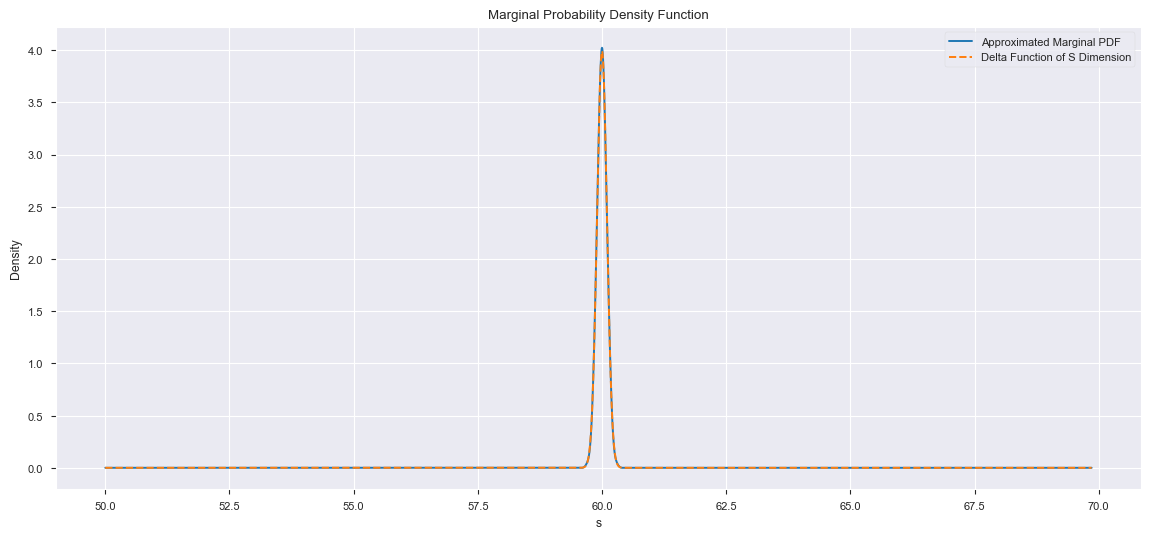

In [21]:
delta_s = delta @ fpe.nodes_weights['v_weights']
marginal_s = delta_osqp @ fpe.nodes_weights['v_weights']

fig = plt.figure(figsize=(14, 6))
up_index = np.argmin(np.abs(fpe.s_points - 70.0))
plt.plot(fpe.s_points[:up_index], marginal_s[:up_index], label='Approximated Marginal PDF')
plt.plot(fpe.s_points[:up_index], delta_s[:up_index], label='Delta Function of S Dimension', linestyle='--')
plt.title('Marginal Probability Density Function')
plt.xlabel('s')
plt.ylabel('Density')
plt.legend()
plt.tick_params(left=True, bottom=True)
plt.show()

**Numerical Solution of the Fokker-Planck Equation**

In [22]:
start = perf_counter()
pdf, time = fpe.fpe_solver(sigma0=0.1)
end = perf_counter()
elapsed = end - start
print(f"Fokker-Planck solver time: {int(elapsed // 60)}m, {elapsed % 60:.2f}s")

Fokker-Planck solver time: 0m, 33.75s


**PDF at Maturity**

In [23]:
v_index = np.argmin(np.abs(fpe.v_points - 0.3))
s_index = np.argmin(np.abs(fpe.s_points - 120.0))

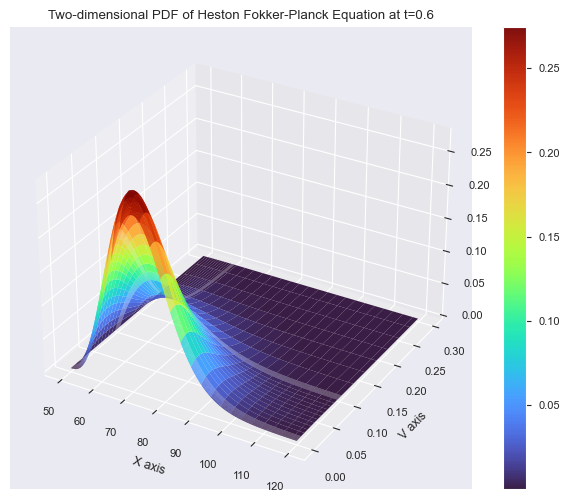

In [24]:
two_dimension = pdf
V, U= np.meshgrid(fpe.points_list[1][:v_index], fpe.s_points[:s_index])
 
# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
X = two_dimension[:s_index, :v_index, -1]
surf = ax.plot_surface(U, V, X, cmap='turbo', edgecolor='none', alpha=0.95)
plt.colorbar(surf)
plt.xlabel('X axis')
plt.ylabel('V axis')
plt.title('Two-dimensional PDF of Heston Fokker-Planck Equation at t=0.6')
plt.show()

**Marginal distribution of the asset's price and its variance at maturity**

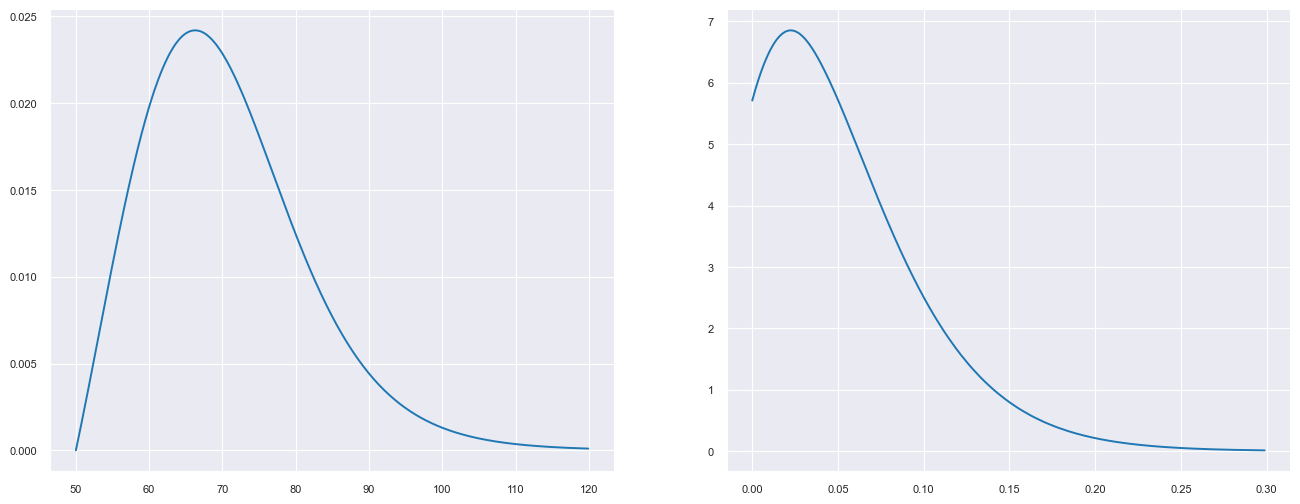

In [25]:
marg_s1 = X @ fpe.nodes_weights['v_weights'][:v_index]
marg_v1 = fpe.nodes_weights['s_weights'][:s_index] @ X
fig = plt.figure(figsize=(16, 6))
ax1 = plt.subplot(121)
ax1.plot(fpe.s_points[:s_index], marg_s1, label='Marginal PDF over s')
ax2 = plt.subplot(122)  
ax2.plot(fpe.v_points[:v_index], marg_v1, label='Marginal PDF over s (Simpson)')
fig.show()

**Marginal distribution of the asset's price and its variance at several time-steps**

In [26]:
marg_s = [pdf[:, :, i] @ fpe.nodes_weights['v_weights'] for i in range(pdf.shape[2])]
marg_v = [fpe.nodes_weights['s_weights'] @ pdf[:, :, i] for i in range(pdf.shape[2])]

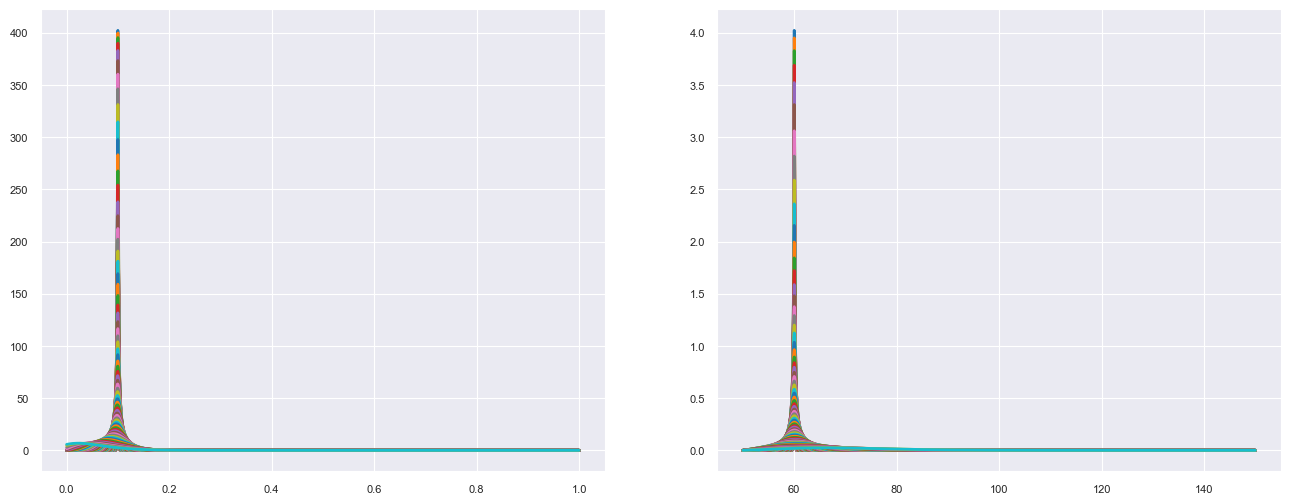

In [27]:
plt.figure(figsize=(16, 6))
for i in range(0, len(marg_v)):
    ax1 = plt.subplot(121)
    surf1 = ax1.plot(fpe.v_points[:], marg_v[i][:], lw=2, label=f't={time[i]:.2f}')
    ax2 = plt.subplot(122)
    surf2 = ax2.plot(fpe.s_points, marg_s[i], lw=2, label=f't={time[i]:.6f}')
plt.show()

## Adaptive Step Size 

In [28]:
def step_size(fpe, sigma0_range):
    """
    Compute the adaptive step size for the Fokker-Planck equation solver.

    Returns:
    step_size: adaptive step size
    """
    # Initialize an empty list to store the step sizes
    step_sizes = []

    # Iterate over sigma0 values
    for sigma0 in sigma0_range:
        # Solve the Fokker-Planck equation for the current sigma0 value
        solution = fpe.qt_ode(sigma0=sigma0)
        time = solution.t

        # Compute the step size 
        step_size = np.diff(time)

        # Append the step size to the list
        step_sizes.append(step_size)

    return np.asarray(step_sizes, dtype=object)

In [29]:
start = perf_counter()
# Define the sigma0 values
sigma0_range = np.array([0.1, 0.2, 0.5])
time_diff = step_size(fpe, sigma0_range)

end = perf_counter()
elapsed = end - start
print(f"Step size computation time: {int(elapsed // 60)}m, {elapsed % 60:.2f}s")

Step size computation time: 1m, 2.04s


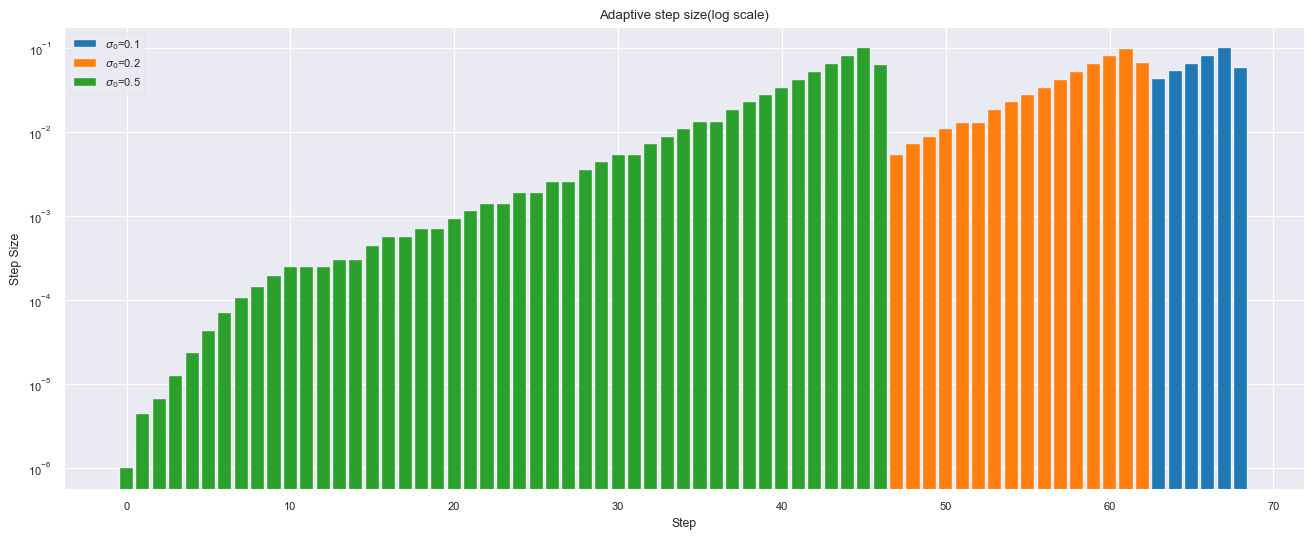

In [30]:
plt.figure(figsize=(16, 6))
for i in range(time_diff.shape[0]):
    plt.bar(np.arange(len(time_diff[i])), time_diff[i], label=f'$\sigma_0$={sigma0_range[i]:.1f}')
plt.xlabel('Step')
plt.ylabel('Step Size')
plt.yscale('log')
plt.title('Adaptive step size(log scale)')
plt.legend()
plt.show()

# Barrier Option Pricing

## Risk-neutral Pricing with Stochastic Volatility

In the risk-neutral world, the expected return of any asset equals the risk-free rate ( r ); the price of a derivative at time ( t ) is the expected discounted payoff under the risk-neutral measure $\mathbb{Q}$ :

$$ V(S,v;t)=e^{-r(T-t)}E^{\mathbb{Q}}[\mathbf{Payoff}(S_T)] $$

This expectation requires integrating the payoff over the joint PDF $f(s, v)$ of $(S(T), V(T))$:

$$
V(t) = e^{-r(T-t)} \int_{0}^{\infty} \int_{0}^{\infty} \mathbf{Payoff}(S_T) f(s, v) ds dv
$$

**Down-and-Out Barrier European Call Option** 

A down-and-out call option is a barrier option that becomes worthless if the asset price $S_t$ hits or falls below a barrier B (where $B < S_0$) before expiration at time $T$. If the barrier is not breached, it pays the standard call payoff $\max ⁡(S_T−K,0)$ at maturity, where $K(K > B)$ is the strike price.

The option's price under risk-neutral pricing is:

$$ V(S_0, v_0;t)=e^{-r(T-t)}E^{\mathbb{Q}}\left[\max(S_T-K, 0) \cdot \mathbf{1}_{\underset{0\leq t \leq T}{\min} S_t > B} \mid S_0,v_0 \right] $$

This expectation can be decomposed using the joint probability of the stock price being above the strike and not hitting the barrier.

$$
V(S_0, v_0;t)=e^{-r(T-t)} \int_{0}^{\infty} \int_{K}^{\infty} (S_T-K) f(S_T > K ,\underset{0\leq t \leq T}{\min} S_t > B; v_T )dsdv
$$

## Marginal Distribution

**Parameters setting**

In [31]:
S0 = 60.0
asset_range = (50.0, 150.0)
var_range = (0.00, 1.0)
normalize_S0 = (S0 - asset_range[0]) / (asset_range[1] - asset_range[0])
rho = -0.4

In [32]:
number_s = 38                       # knots number
degree_s = 3                        # degree of B-spline
center_s = round(normalize_S0, 3)   # center point (0-1)
#center_s = 0.1
bound_s = asset_range
std_s = 0.1
s = GenerateKnots(number_s, degree_s, method='non-uniform', center=center_s, boundary=bound_s, 
                  mean=S0, std=std_s).generate_knots()
s = s[1:]

number_v = 38                       # knots number
degree_v = 3                        # degree of B-spline
center_v = 0.1                      # center point (0-1)
bound_v  = tuple((0.0, 1.0))        # variance range
#std_v = round(0.1 * np.sqrt(0.05), 4)
std_v = 0.001
v = GenerateKnots(number_v, degree_v, method='non-uniform', center=center_v, boundary=bound_v,
                  mean=center_v, std=std_v).generate_knots()

degrees = [degree_s, degree_v]  
knots_lists = [s, v] 
conditions_list = [] 
x_conditions = ('dirichlet', 'newmann')
v_conditions = ('newmann', 'newmann')
#conditions_list = [x_conditions, v_conditions]

**Computing the marginal distribution of the asset's price for different initial conditions.**

In [33]:
def marginal_distribution(fpe, sigma, time_eval=None):
    """
    Compute the marginal distribution of the asset's price for different initial conditions.
    
    Parameters:
    fpe: HestonSolver instance
    sigma0: initial standard deviation
    time_eval: evaluation times (default: None)
    
    Returns:
    marginal_s: marginal distribution of the asset's price
    """
    sigma_s = np.asarray(sigma)

    diff_disribution = []
    for sigma0 in sigma_s:
        pdf_eval = fpe.fpe_solver(sigma0=sigma0, time=time_eval)[0]
        marginal_s = np.einsum('ijk, j -> ik', pdf_eval, fpe.nodes_weights['v_weights'])
        diff_disribution.append(marginal_s)
    
    return np.array(diff_disribution)

In [34]:
fpe = HestonSolver(degrees, knots_lists, conditions_list, params={'S_range': asset_range, 'V_range': var_range, 'rho': rho, 'S0': S0})
diff_sigma = np.array([0.1, 0.2, 0.5, 1.0, 2.0])
time_eval = np.array([0, 1, 10, 30, 216]) / 360

start = perf_counter()
marginal_asset = marginal_distribution(fpe, sigma=diff_sigma, time_eval=time_eval)
end = perf_counter()
elapsed = end - start
print(f"Marginal distribution computation time: {int(elapsed // 60)}m, {elapsed % 60:.2f}s")

Marginal distribution computation time: 1m, 59.19s


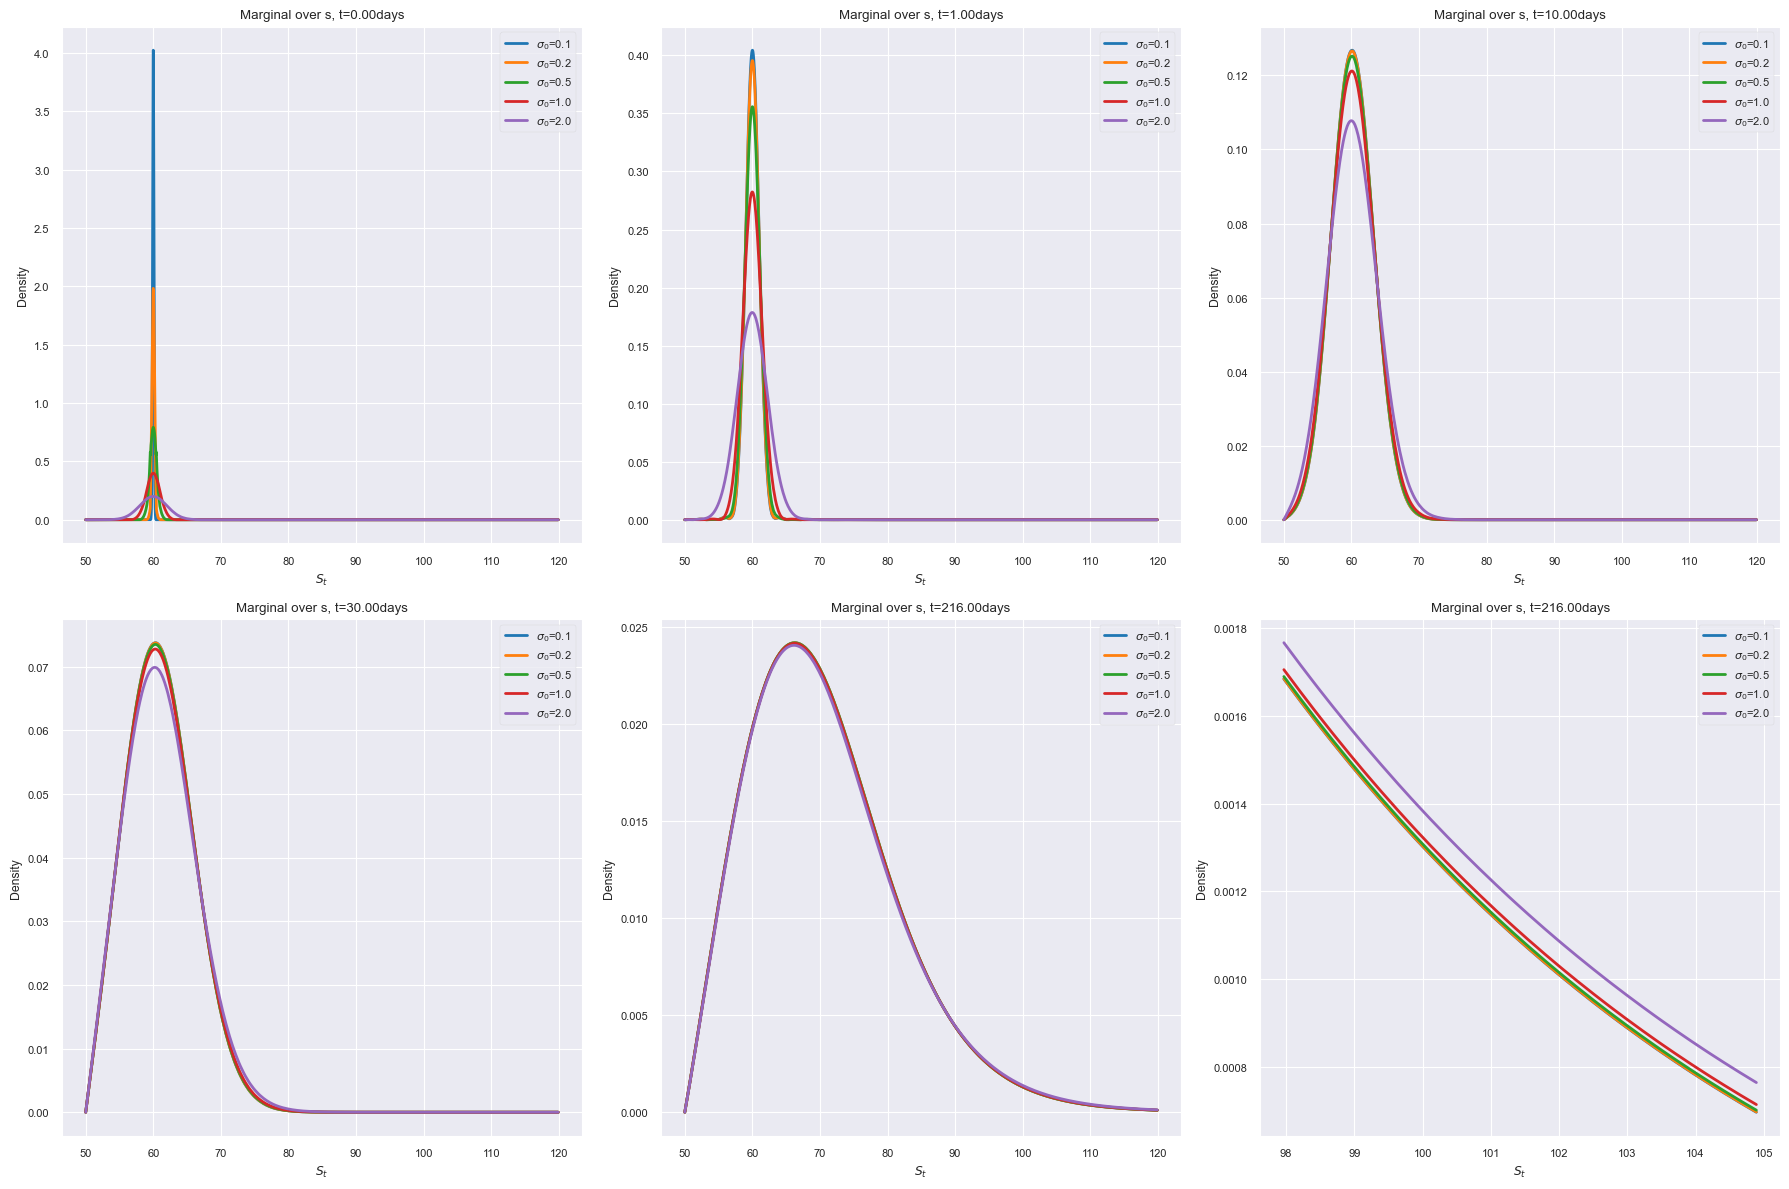

In [35]:
fig = plt.figure(figsize=(18, 12))
cols = 3  
rows = 2
upper_index = np.argmin(np.abs(fpe.s_points - 120.0)) 
for i in range(marginal_asset.shape[2]):
    ax = plt.subplot(rows, cols, i + 1)
    for j in range(marginal_asset.shape[0]):
        ax.plot(fpe.s_points[:upper_index], marginal_asset[j, :upper_index, i], lw=2, label=f'$\sigma _0$={diff_sigma[j]}')
    ax.set_title(f'Marginal over s, t={time_eval[i] * 360:.2f}days')
    ax.set_xlabel('$S_t$')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True)

l_index = np.argmin(np.abs(fpe.s_points - 98.0)) 
u_index = np.argmin(np.abs(fpe.s_points - 105.0))
ax1 = plt.subplot(rows, cols, 6)
for j in range(marginal_asset.shape[0]):
    ax1.plot(fpe.s_points[l_index:u_index], marginal_asset[j, l_index:u_index, -1], lw=2, label=f'$\sigma _0$={diff_sigma[j]}')
    ax1.set_title(f'Marginal over s, t={time_eval[-1] * 360:.2f}days')
    ax1.set_xlabel('$S_t$')
    ax1.set_ylabel('Density')
    ax1.legend()
    ax1.grid(True)

plt.tight_layout()
plt.show()

**Marginal distribution of the asset's price for different initial price**

In [36]:
def marginal_S0(S0, sigma, time_eval=None):
    price_s = np.asarray(S0)
    asset_range = (50.0, 150.0)
    
    diff_disribution = []
    for s in price_s:
        center_s = (s - asset_range[0]) / (asset_range[1] - asset_range[0])
        center_s = round(center_s, 4)
        s_knot = GenerateKnots(number_s, degree_s, method='non-uniform', center=center_s, boundary=bound_s, 
                    mean=s, std=std_s).generate_knots()
        s_knot = s_knot[1:]
        degrees = [degree_s, degree_v]  # degrees for each dimension
        knots_lists = [s_knot, v] 
        x_conditions = ('dirichlet', 'newmann')
        v_conditions = ('newmann', 'newmann')
        #conditions_list = [x_conditions, v_conditions]
        conditions_list = [] 
        fpe = HestonSolver(degrees, knots_lists, conditions_list, params={'S0': s})
        pdf_eval = fpe.fpe_solver(sigma0=sigma, time=time_eval)[0]
        marginal_s = np.einsum('ijk, j -> ik', pdf_eval, fpe.nodes_weights['v_weights'])
        s_weights = fpe.nodes_weights['s_weights']
        s_points = fpe.s_points
        diff_disribution.append([marginal_s[:, -1], s_weights, s_points])
    
    return np.array(diff_disribution)

In [37]:
diff_S0 = np.array([59.5, 60.0, 60.5])

start = perf_counter()
marginal_asset_S0 = marginal_S0(S0=diff_S0, sigma=0.1, time_eval=time_eval)
end = perf_counter()
elapsed = end - start
print(f"Marginal distribution computation time for different S0: {int(elapsed // 60)}m, {elapsed % 60:.2f}s")

Marginal distribution computation time for different S0: 1m, 23.08s


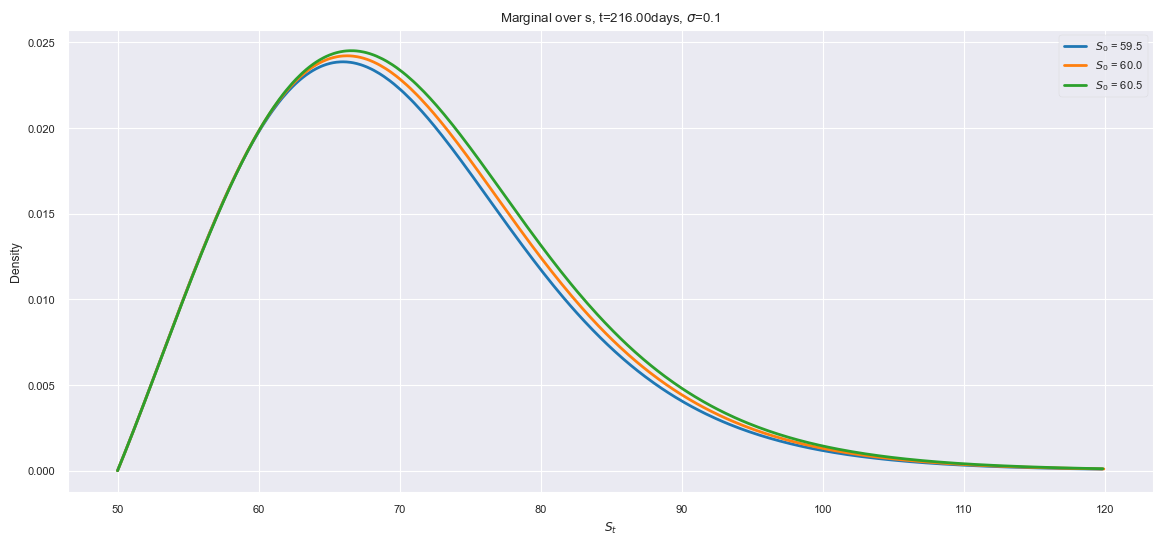

In [38]:
fig = plt.figure(figsize=(14, 6))
for i in range(marginal_asset_S0.shape[0]):
    upper_index = np.argmin(np.abs(marginal_asset_S0[i, 2, :] - 120.0)) 
    plt.plot(marginal_asset_S0[i, 2, :upper_index], marginal_asset_S0[i, 0, :upper_index], lw=2, label=f'$S_0$ = {diff_S0[i]}')
plt.title(f'Marginal over s, t={time_eval[-1] * 360:.2f}days, $\sigma$=0.1')
plt.xlabel('$S_t$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

## Comparison of down-and-out barrier European call options with different initial conditions

In [39]:
def option_pricing(pdf, price, strike, time, rate):
    """
    Compute the European option pricing for different strikes, times.
    
    Parameters:
    pdf: Probability density function from the FPE solver, pdf.shape = (n_diff_parameter, n_s, n_t)
    price: asset price
    strike: strike price
    time: evaluation times 
    rate: risk-free interest rate
    
    Returns:
    option value: option value for different strikes, shape = (n_strike, n_diff_parameter, n_t)
    """
    strike = np.asarray(strike)
    price = np.asarray(price)
    time = np.asarray(time)
    n_diff_parameter, n_s, n_t = pdf.shape
    n_strike = len(strike)
    tau = time[-1] - time  # Time to maturity
    quad_weights = fpe.nodes_weights['s_weights']

    # Use the last time step for pricing
    pdf_maturity = pdf[:, :, -1]  
    
    option_value = np.zeros((n_strike, n_diff_parameter, n_t))
    
    for i in range(n_diff_parameter):
        for j in range(n_strike):
            for k in range(n_t):
                # Calculate the option value at each time step
                option_value[j, i, k] = np.exp(-rate * tau[k]) * np.dot(pdf_maturity[i, :] * np.maximum(price - strike[j], 0.0), quad_weights)

    return option_value

In [40]:
strikes = np.linspace(65, 115, 11)
prices = fpe.s_points
rate = 0.1
diff_sigma = np.array([0.1, 0.2, 0.5, 1.0, 2.0])
monte_carlo = np.array([4.716, 2.939, 1.729, 0.973, 0.531, 0.285, 0.152, 0.0805, 0.0427, 0.0228, 0.0122])

In [41]:
call_option = option_pricing(pdf=marginal_asset, price=prices, strike=strikes, time=time_eval, rate=rate)

We compare the option's value at maturity, V(T), under different conditions.

In [42]:
call_price = pd.DataFrame(call_option[:, :, -1], index=strikes,
                         columns=[f'sigma0 = {diff_sigma[i]}' 
                                 for i in range(len(diff_sigma))])
call_price = pd.concat([pd.DataFrame(monte_carlo, index=strikes, columns=['Monte Carlo']), call_price], axis=1)
call_price.round(4)

,Monte Carlo,sigma0 = 0.1,sigma0 = 0.2,sigma0 = 0.5,sigma0 = 1.0,sigma0 = 2.0
65.0,4.7160,4.7122,4.7125,4.7142,4.7197,4.7418
70.0,2.9390,2.9405,2.9408,2.9433,2.9511,2.9827
75.0,1.7290,1.7328,1.7332,1.7360,1.7451,1.7818
80.0,0.9730,0.9763,0.9767,0.9795,0.9884,1.0242
85.0,0.5310,0.5332,0.5335,0.5359,0.5435,0.5739
90.0,0.2850,0.2857,0.2860,0.2878,0.2936,0.3170
95.0,0.1520,0.1517,0.1519,0.1532,0.1573,0.1739
100.0,0.0805,0.0803,0.0804,0.0813,0.0841,0.0953
105.0,0.0427,0.0426,0.0427,0.0432,0.0450,0.0523
110.0,0.0228,0.0226,0.0227,0.0230,0.0242,0.0288


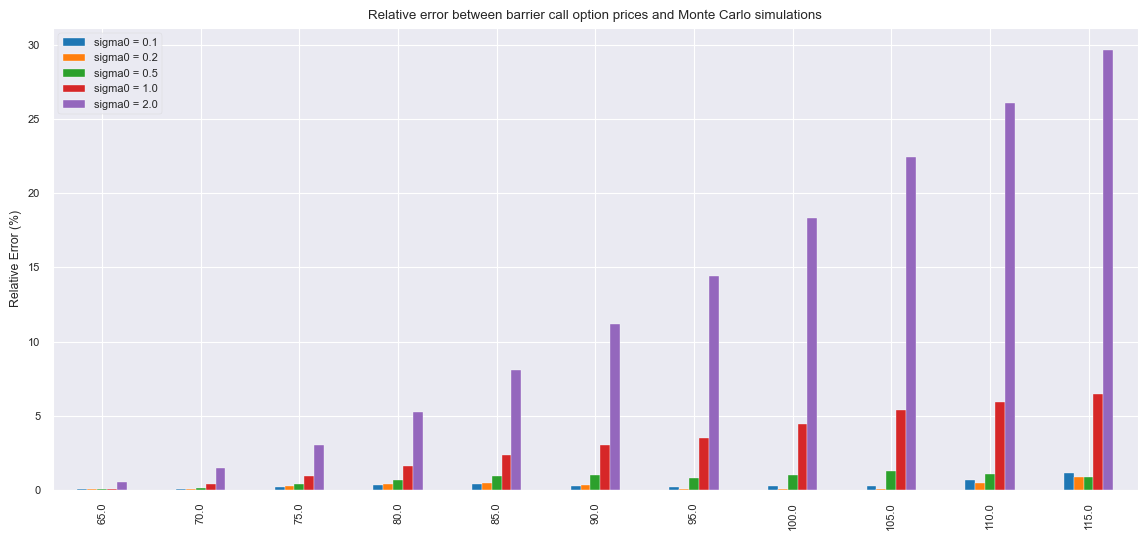

In [43]:
diff_df = call_price.loc[:, call_price.columns != 'Monte Carlo'].subtract(call_price['Monte Carlo'], axis=0).abs()
diff_df = diff_df.div(call_price['Monte Carlo'], axis=0) * 100
diff_df.plot(kind='bar', figsize=(14, 6))
plt.title('Relative error between barrier call option prices and Monte Carlo simulations')
plt.ylabel('Relative Error (%)')
plt.show()

## Delta and Gamma for different strikes

Delta and Gamma are computed numerically by a finite difference scheme.

$$
\Delta = \frac{V_{i+1}-V_{i-1}}{h}
$$

$$
\Gamma = \frac{V_{i+1}-2V_{i}+V_{i-1}}{h^2}
$$

In [44]:
def option_value(pdf, strike):

    strike = np.asarray(strike)
    n_diff_parameter = pdf.shape[0]
    n_strike = len(strike) 
    
    option_value = np.zeros((n_strike, n_diff_parameter))
    
    for i in range(n_diff_parameter):
        for j in range(n_strike):
                pdf_maturity = pdf[i, 0, :]
                quad_weights = pdf[i, 1, :]
                price = pdf[i, 2, :]
                option_value[j, i] = np.dot(pdf_maturity * np.maximum(price - strike[j], 0.0), quad_weights)

    return option_value

In [45]:
strikes = np.linspace(50, 130, 59)
diff_S0_option = option_value(pdf=marginal_asset_S0, strike=strikes)

In [46]:
diff_S0_call_price = pd.DataFrame(diff_S0_option, index=strikes,
                         columns=[f'S0 = {diff_S0[i]}' 
                                 for i in range(len(diff_S0))])
diff_S0_call_price.head(10)

,S0 = 59.5,S0 = 60.0,S0 = 60.5
50.000000,12.448237,13.029714,13.607280
51.379310,11.605165,12.160448,12.713136
52.758621,10.767557,11.296653,11.824452
54.137931,9.941090,10.443994,10.946875
55.517241,9.131488,9.608204,10.086109
56.896552,8.344347,8.794857,9.247719
58.275862,7.584914,8.009217,8.436964
59.655172,6.857961,7.256091,7.658641
61.034483,6.167649,6.539645,6.916981
62.413793,5.517190,5.863253,6.215540


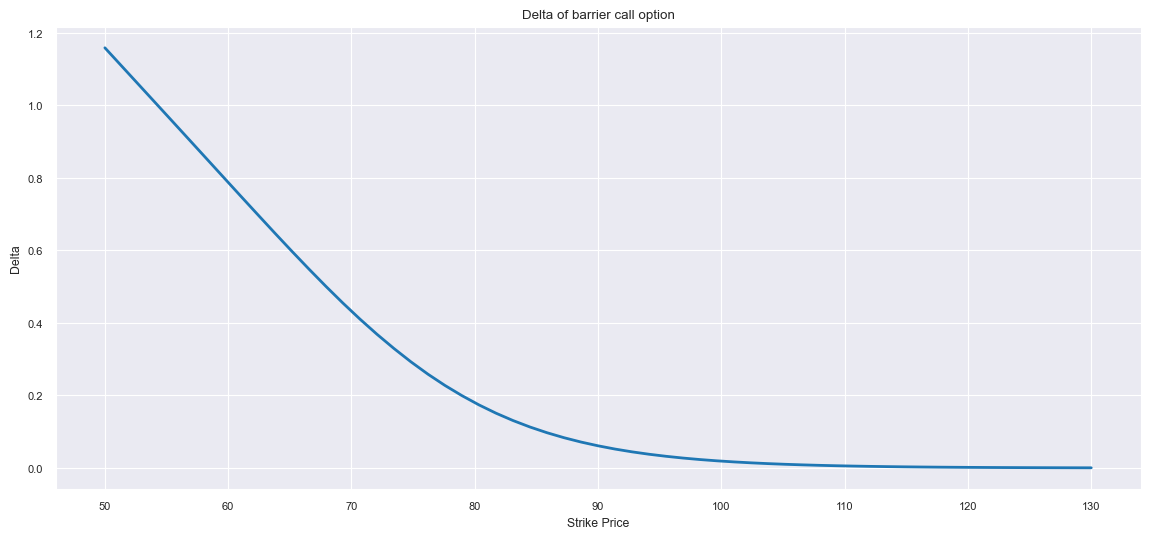

In [47]:
delta_option = (diff_S0_call_price.loc[:, 'S0 = 60.5'] - diff_S0_call_price.loc[:, 'S0 = 59.5']) / 1.0
delta_option.plot(kind='line', figsize=(14, 6), lw=2)
plt.title('Delta of barrier call option')
plt.xlabel('Strike Price')
plt.ylabel('Delta')
plt.grid(True)
plt.show()

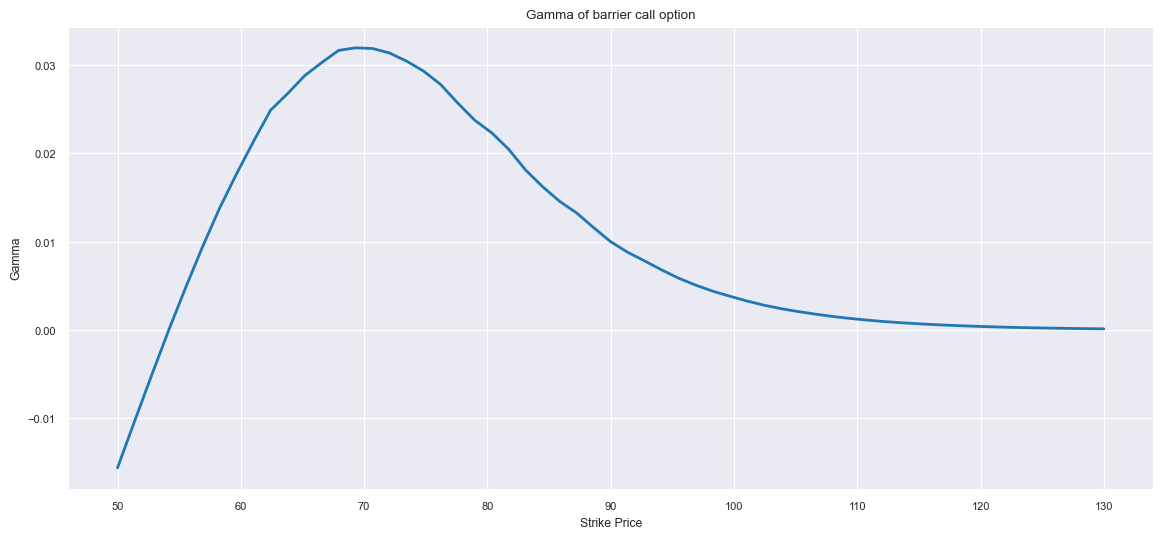

In [48]:
gamma_option = (diff_S0_call_price.loc[:, 'S0 = 60.5'] - 2 * diff_S0_call_price.loc[:, 'S0 = 60.0'] 
                + diff_S0_call_price.loc[:, 'S0 = 59.5']) / (0.5 ** 2)
gamma_option.plot(kind='line', figsize=(14, 6), lw=2)
plt.title('Gamma of barrier call option')
plt.xlabel('Strike Price')
plt.ylabel('Gamma')
plt.grid(True)
plt.show()

# Conclusions

The number of knots is crucial. To balance numerical precision and computational efficiency, we select a range of 30 to 50 knots, which represents a trade-off between numerical stability and efficiency. In the Delta function approximation, Chebyshev nodes with boundary initial value of $\pm$ 4.5 times the standard deviation, combined with constraint optimization, reduce Runge's phenomenon. This algorithmic framework, proposed by S. Stoykov, is suitable for multi-asset option pricing, but this program applies only to single-asset cases. As the number of assets increases, computational costs rise, necessitating a shift to languages like C++ or Julia, or the use of deep learning for ODE solving, potentially incorporating GPU acceleration in the numerical procedure.

# Reference

- [1] Stoykov, S. (2024). [Numerical Solution of Fokker-Planck Equation by Variational Approach – an Application to Pricing Barrier Options. *Wilmott*, 2024(133).](https://doi.org/10.54946/wilm.12077)
- [2] Polanco, J. I. (2021). [*BSplineKit.jl*: a collection of B-spline tools in Julia (Version 0.8.0)](https://doi.org/10.5281/zenodo.5150350).
- [3] Grimstad, B., et al. (2015). [*SPLINTER: a library for multivariate function approximation with splines*](http://github.com/bgrimstad/splinter).
- [4] Hilber, N., Reichmann, O., Schwab, C., & Winter, C. (2013). *Computational Methods for Quantitative Finance: Finite Element Methods for Derivative Pricing*. Springer Berlin, Heidelberg.
- [5] Kincaid, D., & Cheney, W. (2002). *Numerical Analysis: Mathematics of Scientific Computing* (3rd ed.). American Mathematical Society.
- [6] Burden, R. L., & Faires, J. D. (2010). *Numerical Analysis* (9th ed.). Cengage Learning.
- [7] Ovalle, J. T. *The Heston Model: A Practical Approach with Matlab Code*.
- [8] Strang, G., & Fix, G. (2008). *An Analysis of the Finite Element Method* (2nd ed.). Wellesley-Cambridge Press.
- [9] Zhao, Y., Zhang, M., Ni, Q., & Wang, X. (2023). [Adaptive nonparametric density estimation with B-spline bases](https://doi.org/10.3390/math11020291). *Mathematics*, *11*(2), 291. 
